In [3]:
suppressWarnings(suppressMessages(library(tidyverse))) #ggplot and dplyr
suppressWarnings(suppressMessages(library(reshape2))) #melt
suppressWarnings(suppressMessages(library(VIM)))
suppressWarnings(suppressMessages(library(moments)))

In [4]:
library(ggpubr)

# EAD - Assignment2
## Health systems -> How do each country's health indicators influence the growth of covid cases, tests and deaths?

Vasco Campos -> up201908482

Bruno Reis -> up201908682

__Estatística e Análise de dados__, June 2020

# Introduction
blah blah blah

# Datasets: adding predictor and target variables
The main dataset contains some health system indicators for each country in the world, but lacks target variables and some descriptive variables like the population of the country for example or its continent.

## World bank health systems
__What does each column mean?__
1. __Country__: the region as used in Kaggle Covid-19 spread data challenges.
2. __Province__: the region as used in Kaggle Covid-19 spread data challenges.
3. __Bank_Name__: the name of the country used by the World Bank
4. __Health_exp_pct_of_GDP__: Level of current health expenditure expressed as a percentage of GDP. Estimates of current health expenditures include healthcare goods and services consumed during each year. This indicator does not include capital health expenditures such as buildings, machinery, IT and stocks of vaccines for emergency or outbreaks.
5. __Health_exp_funded_by_public__: Share of current health expenditures funded from domestic public sources for health. Domestic public sources include domestic revenue as internal transfers and grants, transfers, subsidies to voluntary health insurance beneficiaries, non-profit institutions serving households (NPISH) or enterprise financing schemes as well as compulsory prepayment and social health insurance contributions. They do not include external resources spent by governments on health.
6. __Health_exp_funded_by_household__: Share of out-of-pocket payments of total current health expenditures. Out-of-pocket payments are spending on health directly out-of-pocket by households.
7. __Health_exp_percapita_USD__: Current expenditures on health per capita in current US dollars. Estimates of current health expenditures include healthcare goods and services consumed during each year.
8. __Health_exp_percapita_PPP__: Current expenditures on health per capita expressed in international dollars at purchasing power parity (PPP).
9. __Health_exp_pct_funded_by_externals__: Share of current health expenditures funded from external sources. External sources compose of direct foreign transfers and foreign transfers distributed by government encompassing all financial inflows into the national health system from outside the country. External sources either flow through the government scheme or are channeled through non-governmental organizations or other schemes.
10. __Physicians_per_1000__: Physicians include generalist and specialist medical practitioners.
11. __Nurses_per_1000__: Nurses and midwives include professional nurses, professional midwives, auxiliary nurses, auxiliary midwives, enrolled nurses, enrolled midwives and other associated personnel, such as dental nurses and primary care nurses.
12. __Specialist_surgical_per_100000__: Specialist surgical workforce is the number of specialist surgical, anaesthetic, and obstetric (SAO) providers who are working in each country per 100,000 population.
13. __Birth_reg_pct__: Completeness of birth registration is the percentage of children under age 5 whose births were registered at the time of the survey. The numerator of completeness of birth registration includes children whose birth certificate was seen by the interviewer or whose mother or caretaker says the birth has been registered.
14. __Death_reg_pct__: Completeness of death registration is the estimated percentage of deaths that are registered with their cause of death information in the vital registration system of a country.

In [5]:
df = read_delim("2.12_Health_systems_2.csv",delim=";", col_types = c("fcccddddddddddd"))
colnames(df) = c("Region","Country", "Province", "Bank_Name", "Health_exp_pct_of_GDP", "Health_exp_funded_by_public", "Health_exp_funded_by_household", "Health_exp_percapita_USD", 
                 "Health_exp_percapita_PPP", "Health_exp_pct_funded_by_externals", "Physicians_per_1000", "Nurses_per_1000", "Specialist_surgical_per_100000", "Birth_reg_pct", "Death_reg_pct")
head(df)

Region,Country,Province,Bank_Name,Health_exp_pct_of_GDP,Health_exp_funded_by_public,Health_exp_funded_by_household,Health_exp_percapita_USD,Health_exp_percapita_PPP,Health_exp_pct_funded_by_externals,Physicians_per_1000,Nurses_per_1000,Specialist_surgical_per_100000,Birth_reg_pct,Death_reg_pct
South_Asia,Afghanistan,NA,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
Europe_and_Central_Asia,Albania,NA,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53
Middle_East_and_North_Africa,Algeria,NA,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
Europe_and_Central_Asia,Andorra,NA,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80
Sub_Saharan_Africa,Angola,NA,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
Latin_america_and_caribbean,Antigua and Barbuda,NA,Antigua and Barbuda,4.3,60.6,32.2,623.1,976.4,0.0,2.8,3.1,14.0,NaN,79


In [85]:
sapply(df, class)

Region                            Country 
                          "factor"                        "character" 
                          Province                          Bank_Name 
                       "character"                        "character" 
             Health_exp_pct_of_GDP        Health_exp_funded_by_public 
                         "numeric"                          "numeric" 
    Health_exp_funded_by_household           Health_exp_percapita_USD 
                         "numeric"                          "numeric" 
          Health_exp_percapita_PPP Health_exp_pct_funded_by_externals 
                         "numeric"                          "numeric" 
               Physicians_per_1000                    Nurses_per_1000 
                         "numeric"                          "numeric" 
    Specialist_surgical_per_100000                      Birth_reg_pct 
                         "numeric"                          "numeric" 
                     Death_reg_pct 
                         "numeric"

# PreProcessing
## Removing NANs
First, we check how many nans are in each column of the dataset.

Province has a lot of NA values, because it only contains the provinces of countries and is NA when the country has no province.

In [6]:
cat("percentage of missing values in the entire dataset:", mean(is.na(df) * 100), "%\n")
print(colMeans(is.na(df)))

percentage of missing values in the entire dataset: 19.33333 %
                            Region                            Country 
                         0.0000000                          0.1095238 
                          Province                          Bank_Name 
                         0.9333333                          0.0000000 
             Health_exp_pct_of_GDP        Health_exp_funded_by_public 
                         0.1142857                          0.1142857 
    Health_exp_funded_by_household           Health_exp_percapita_USD 
                         0.1142857                          0.1142857 
          Health_exp_percapita_PPP Health_exp_pct_funded_by_externals 
                         0.1142857                          0.2047619 
               Physicians_per_1000                    Nurses_per_1000 
                         0.1000000                          0.1000000 
    Specialist_surgical_per_100000                      Birth_reg_pct 
              

We decide to remove the variables _Country_ and _Province_, because of the NAs and because the Country variable is only an id for each observation, therefore it has no real information to give us.

The _Death_reg_pct_ is removed due to a high number of NAs and because it would not be viable to impute such a large number of values.

In [7]:
df = df[, !names(df) %in% c("Country", "Province", "Death_reg_pct")]

__Removing all observations that have three or more null values__

This way, most null values are eliminated in an efficient way that also removes the observations with less information available.

In [8]:
df$na_count <- apply(is.na(df), 1, sum)
df = df[(df[,"na_count"]<=3),]

Warning message:
"The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

In [9]:
cat("Percentage of missing values in dataset after removing observation with 3 or more NA values:", mean(is.na(df)) * 100, "%")

Percentage of missing values in dataset after removing observation with 3 or more NA values: 2.936311 %

### KNN imputation
The remaining __3.18%__ of missing values in the dataset are dealt with using the KNN imputation technique. This way, we are able to impute values into observations based on the median of their 5 nearest neighbors.

In [10]:
imputed_data = kNN(df[, !names(df) %in% c("Bank_Name")], imp_var = FALSE, useImputedDist = FALSE)
imputed_data$Bank_Name = df$Bank_Name
cat("Percentage of missing values after KNN imputation:", mean(is.na(imputed_data)), "%")

Percentage of missing values after KNN imputation: 0 %

In [11]:
africa_america_data = imputed_data[imputed_data$Region == "Latin_america_and_caribbean" | imputed_data$Region == "Sub_Saharan_Africa",]

In [12]:
imputed_data

Region,Health_exp_pct_of_GDP,Health_exp_funded_by_public,Health_exp_funded_by_household,Health_exp_percapita_USD,Health_exp_percapita_PPP,Health_exp_pct_funded_by_externals,Physicians_per_1000,Nurses_per_1000,Specialist_surgical_per_100000,Birth_reg_pct,na_count,Bank_Name
South_Asia,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0,Afghanistan
Europe_and_Central_Asia,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,0,Albania
Middle_East_and_North_Africa,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,0,Algeria
Europe_and_Central_Asia,10.4,49.1,41.7,3834.7,4978.7,0.1,3.3,4.0,83.1,100.0,1,Andorra
Sub_Saharan_Africa,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,1.6,25.0,1,Angola
Latin_america_and_caribbean,4.3,60.6,32.2,623.1,976.4,0.0,2.8,3.1,14.0,98.0,1,Antigua and Barbuda
Latin_america_and_caribbean,7.5,74.4,15.8,955.2,1531.0,0.6,4.0,2.6,50.1,100.0,0,Argentina
Europe_and_Central_Asia,9.9,16.5,80.6,358.8,876.9,1.7,2.9,5.6,86.7,99.3,0,Armenia
East_Asia_and_Pacific,9.3,68.3,18.9,5002.4,4529.9,0.0,3.6,12.7,45.1,100.0,0,Australia
Europe_and_Central_Asia,10.4,72.5,18.9,4688.3,5295.2,0.0,5.1,8.2,109.9,100.0,1,Austria


In [81]:
latin_america_nurses = imputed_data[imputed_data$Region == "Europe_and_Central_Asia",] %>% select("Health_exp_funded_by_household","Region")
africa_nurses = imputed_data[imputed_data$Region == "Sub_Saharan_Africa",] %>% select("Health_exp_funded_by_household","Region")
latin_america_nurses_no_out = latin_america_nurses[!latin_america_nurses$Health_exp_funded_by_household %in% boxplot.stats(latin_america_nurses$Health_exp_funded_by_household)$out,]
africa_nurses_no_out = africa_nurses[!africa_nurses$Health_exp_funded_by_household %in% boxplot.stats(africa_nurses$Health_exp_funded_by_household)$out,]

df_nurses_no_out = rbind(latin_america_nurses_no_out,africa_nurses_no_out)

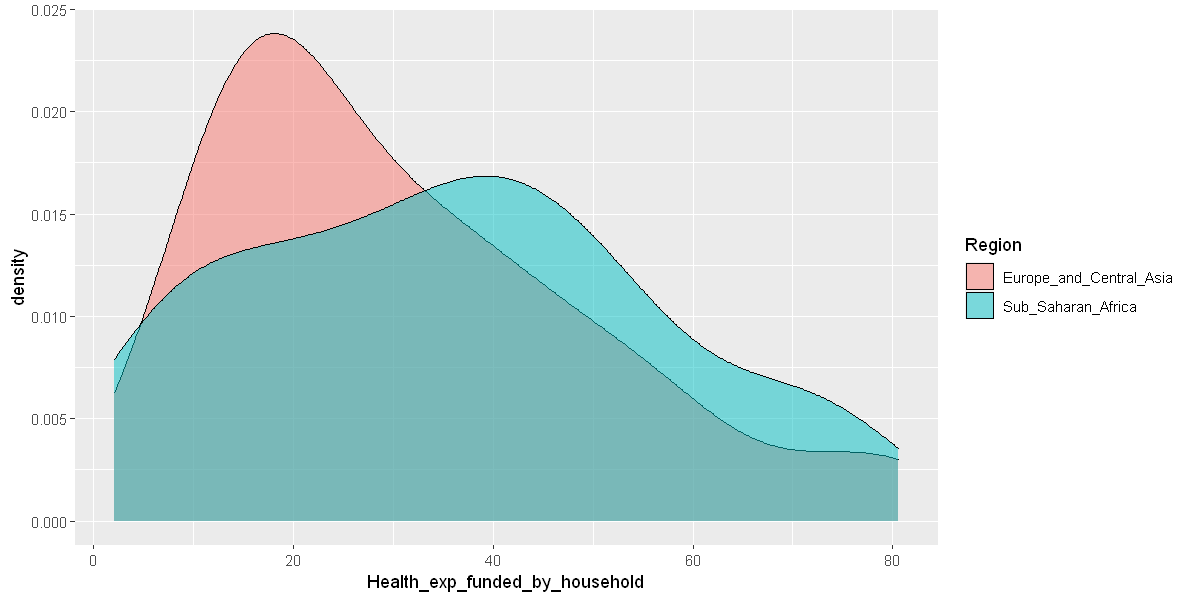

In [82]:
ggplot(imputed_data[imputed_data$Region == "Europe_and_Central_Asia" | imputed_data$Region == "Sub_Saharan_Africa",], aes(Health_exp_funded_by_household, fill = Region)) + 
  geom_density(,alpha = 0.5)

In [83]:
wilcox.test(latin_america_nurses$Health_exp_funded_by_household,africa_nurses$Health_exp_funded_by_household)


	Wilcoxon rank sum test with continuity correction

data:  latin_america_nurses$Health_exp_funded_by_household and africa_nurses$Health_exp_funded_by_household
W = 1048, p-value = 0.2937
alternative hypothesis: true location shift is not equal to 0


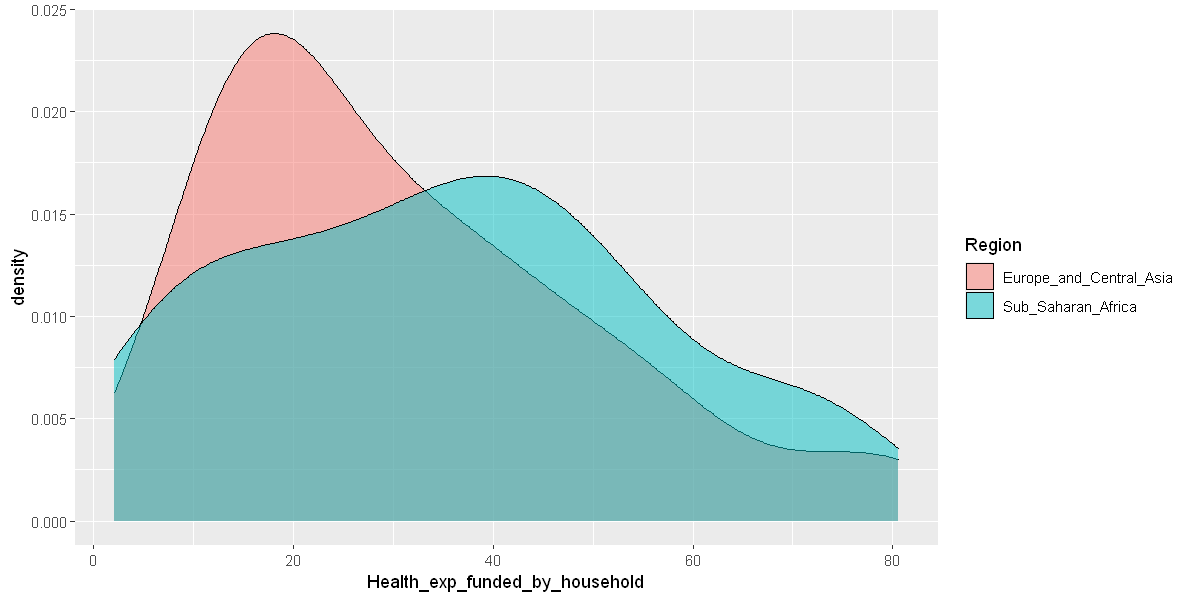

In [84]:
ggplot(df_nurses_no_out, aes(Health_exp_funded_by_household, fill = Region)) + 
  geom_density(alpha = 0.5)

In [85]:
wilcox.test(latin_america_nurses_no_out$Health_exp_funded_by_household,africa_nurses_no_out$Health_exp_funded_by_household)


	Wilcoxon rank sum test with continuity correction

data:  latin_america_nurses_no_out$Health_exp_funded_by_household and africa_nurses_no_out$Health_exp_funded_by_household
W = 1048, p-value = 0.2937
alternative hypothesis: true location shift is not equal to 0


As we can see, the final percentage of missing values is __0%__, meaning our data is ready to be explored.

# Univariate analysis

### Skewness and Kurtosis

In [92]:
install.packages("corrplot")

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bruno Reis\AppData\Local\Temp\RtmpY7QGiD\downloaded_packages


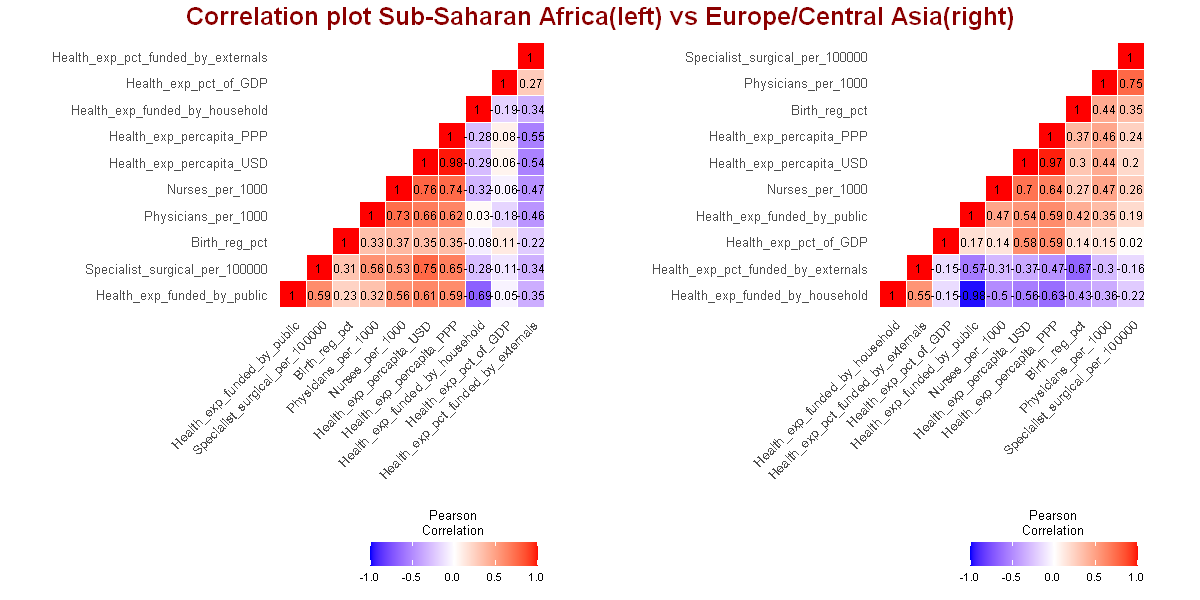

In [71]:
get_upper_tri <- function(cormat){
cormat[lower.tri(cormat)]<- NA
return(cormat)
}
reorder_cormat <- function(cormat){
# Use correlation between variables as distance
dd <- as.dist((1-cormat)/2)
hc <- hclust(dd)
cormat <-cormat[hc$order, hc$order]
}

cormat <- round(cor(imputed_data[imputed_data$Region == "Sub_Saharan_Africa",2:11]),2)

cormat <- reorder_cormat(cormat)

upper_tri <- get_upper_tri(cormat)
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 8, hjust = 1),axis.text.y=element_text(size=8),text=element_text(size=8),axis.title.x=element_text(size=8))+
 coord_fixed()

gg_africa = ggheatmap + 
geom_text(aes(Var2, Var1, label = value), color = "black", size = 2.5) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))
options(repr.plot.width = 5, repr.plot.height = 5)

cormat <- round(cor(imputed_data[imputed_data$Region == "Europe_and_Central_Asia",2:11]),2)

cormat <- reorder_cormat(cormat)

upper_tri <- get_upper_tri(cormat)
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 8, hjust = 1),axis.text.y=element_text(size=8),text=element_text(size=8),axis.title.x=element_text(size=8))+
 coord_fixed()

gg_europe = ggheatmap + 
geom_text(aes(Var2, Var1, label = value), color = "black", size = 2.5) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))

options(repr.plot.width = 10, repr.plot.height = 5)

fig = ggarrange(gg_africa,gg_europe, nrow = 1, ncol = 2,  legend = "bottom", align = "v")
grid = annotate_figure(fig,
                        top = textGrob("Correlation plot Sub-Saharan Africa(left) vs Europe/Central Asia(right)", gp = gpar(fontsize = 15, fontface = "bold", col = "darkred"))) #add a title to the grid
grid


*

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 186 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error 

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,5.38743925,53.8743925,53.87439
Dim.2,1.44717084,14.4717084,68.34610
Dim.3,1.11294768,11.1294768,79.47558
Dim.4,0.70730666,7.0730666,86.54864
Dim.5,0.59909268,5.9909268,92.53957
Dim.6,0.35917518,3.5917518,96.13132
Dim.7,0.20181183,2.0181183,98.14944
Dim.8,0.11947754,1.1947754,99.34422
Dim.9,0.03616694,0.3616694,99.70589
Dim.10,0.02941139,0.2941139,100.00000


In [134]:
var <- get_pca_var(PCA_health)
print(var)

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               


In [136]:
var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Health_exp_pct_of_GDP,4.039563,9.52158273,23.5045028,4.330387e+01,4.371606
Health_exp_funded_by_public,10.740766,5.28874946,26.3150038,7.970221e-03,0.414471
Health_exp_funded_by_household,3.842295,39.19065464,17.5408062,8.244702e-04,2.788418
Health_exp_percapita_USD,12.480103,2.76189312,10.4037261,1.324678e+01,7.453716
Health_exp_percapita_PPP,14.625298,1.28545365,4.9610157,8.920030e+00,6.240703
Health_exp_pct_funded_by_externals,6.124743,26.41740405,6.4755656,6.438153e-01,20.642219
Physicians_per_1000,13.540306,5.66541554,0.2704344,3.577627e-01,16.848280
Nurses_per_1000,14.250759,0.02375249,1.6073254,4.742221e+00,2.624626
Specialist_surgical_per_100000,11.856869,5.71057249,0.8799984,1.468742e+00,32.321163
Birth_reg_pct,8.499299,4.13452184,8.0416215,2.730798e+01,6.294797


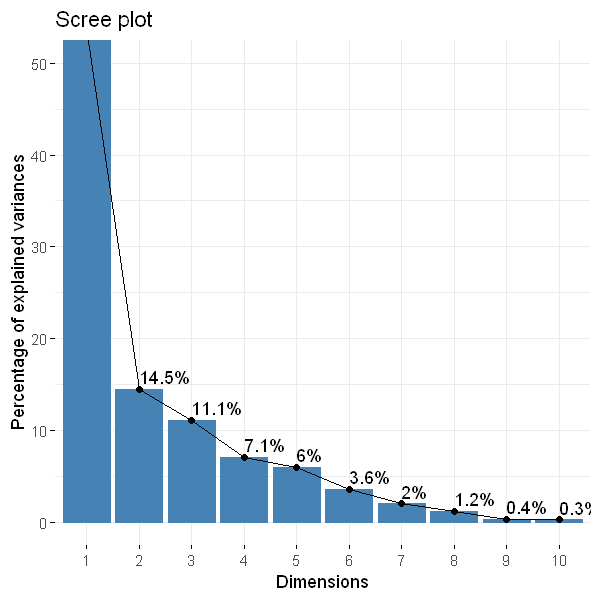

In [139]:
options(repr.plot.width = 5, repr.plot.height = 5)
fviz_eig(PCA_health, addlabels = TRUE, ylim = c(0, 50))

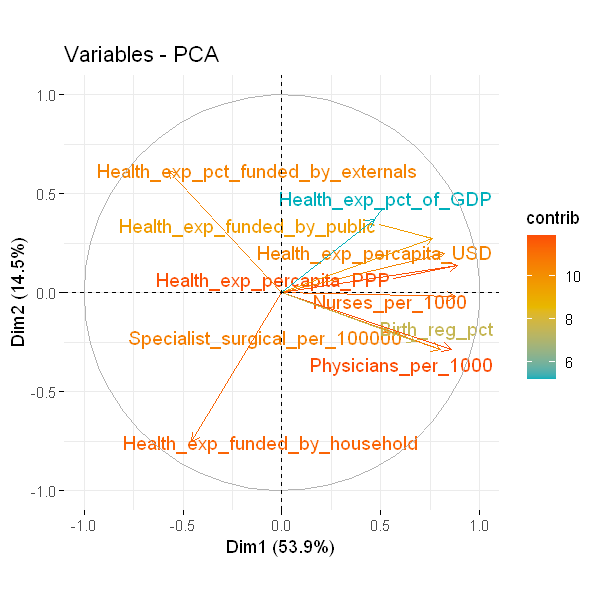

In [138]:
options(repr.plot.width = 5, repr.plot.height = 5)

g2 = fviz_pca_var(PCA_health, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

g2

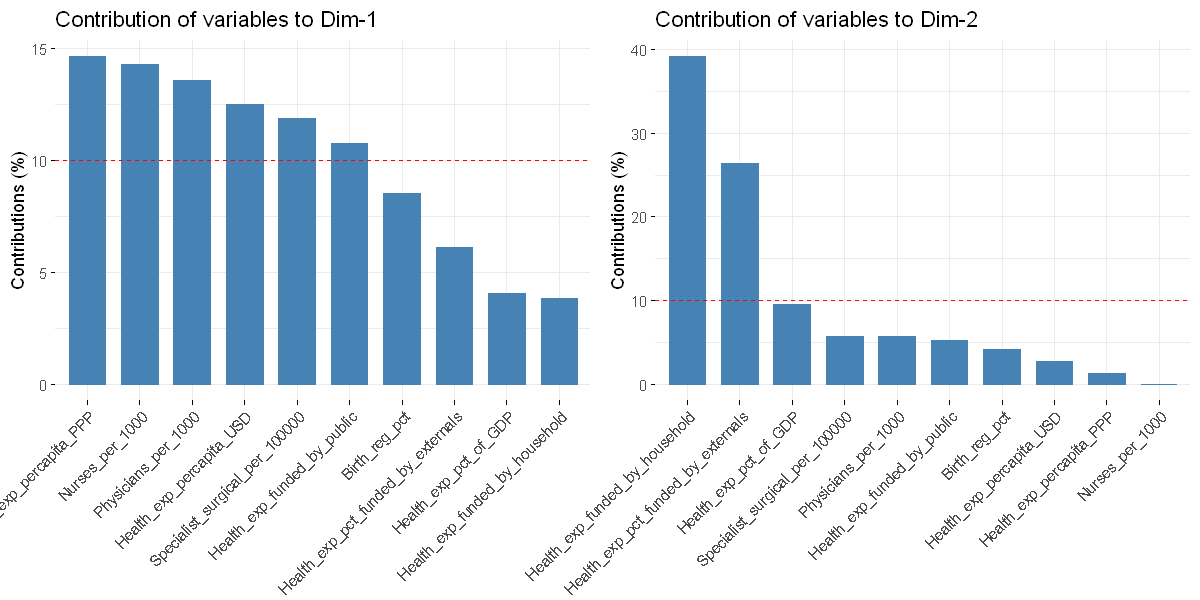

In [130]:
# Contributions of variables to PC1
g1 = fviz_contrib(PCA_health, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
g2 = fviz_contrib(PCA_health, choice = "var", axes = 2, top = 10)

fig_var = ggarrange(g1,g2, nrow = 1, ncol = 2,  legend = "bottom", align = "v")

fig_var

Too few points to calculate an ellipse


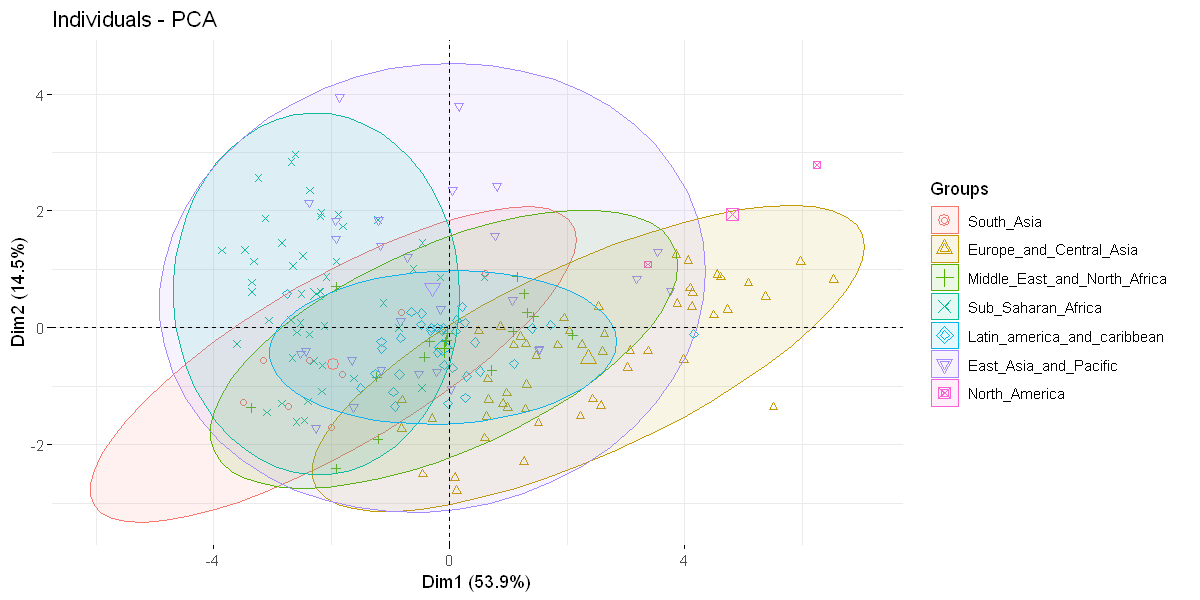

In [113]:
fviz_pca_ind(PCA_health,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = imputed_data$Region, # color by groups
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups"
             )

In [78]:
add_to_results = function(data,results,func,name){
    vector <- double(0)
    for(col in results$cols){
        vector <- c(vector, func(data[col]))
    }
    results[name] = vector
    return(results)
}

In [81]:
results_df = add_to_results(imputed_data,results_df,skewness,"skewness")
results_df = add_to_results(imputed_data,results_df,kurtosis,"kurtosis")

In [82]:
results_df

cols,skewness,kurtosis
Health_exp_pct_of_GDP,1.5706455,8.136753
Health_exp_funded_by_public,-0.2713197,2.066147
Health_exp_funded_by_household,0.5867041,2.628683
Health_exp_percapita_USD,2.6902896,11.091365
Health_exp_percapita_PPP,1.9200630,7.110489
Health_exp_pct_funded_by_externals,1.9445975,6.291706
Physicians_per_1000,0.9985793,3.872350
Nurses_per_1000,1.4576566,5.027122
Specialist_surgical_per_100000,1.2837752,4.256832
Birth_reg_pct,-1.7804230,5.444164


In [46]:
results_df <- data.frame(cols=c("Health_exp_pct_of_GDP","Health_exp_funded_by_public","Health_exp_funded_by_household","Health_exp_percapita_USD","Health_exp_percapita_PPP","Health_exp_pct_funded_by_externals","Physicians_per_1000","Nurses_per_1000","Specialist_surgical_per_100000","Birth_reg_pct"),
                 stringsAsFactors=FALSE)

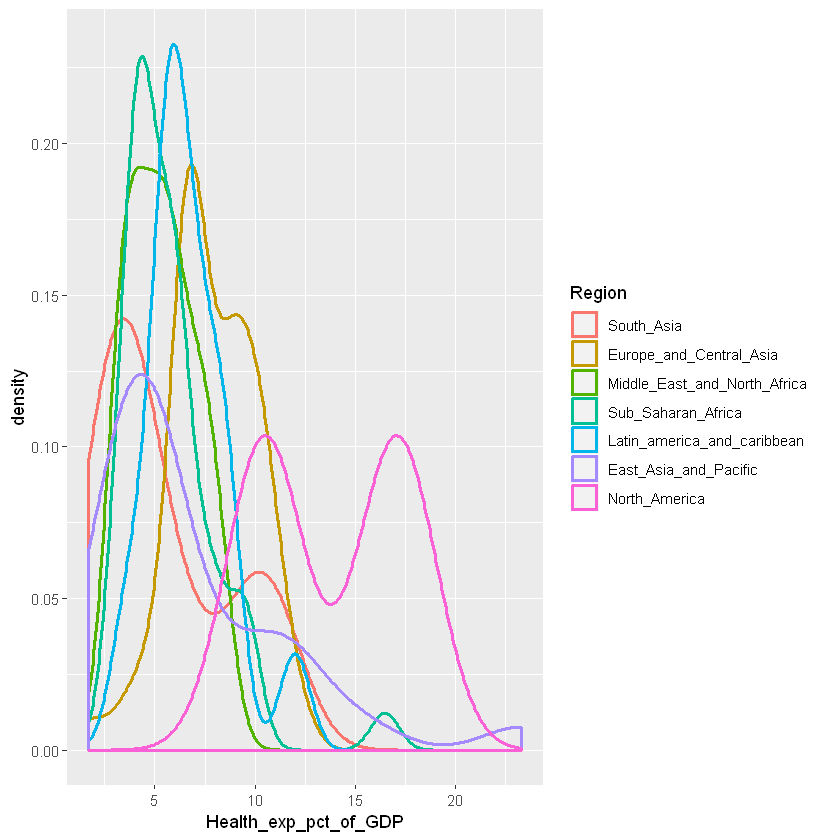

In [111]:
ggplot(imputed_data,aes(x=Health_exp_pct_of_GDP,color=Region))+geom_density(size=1)

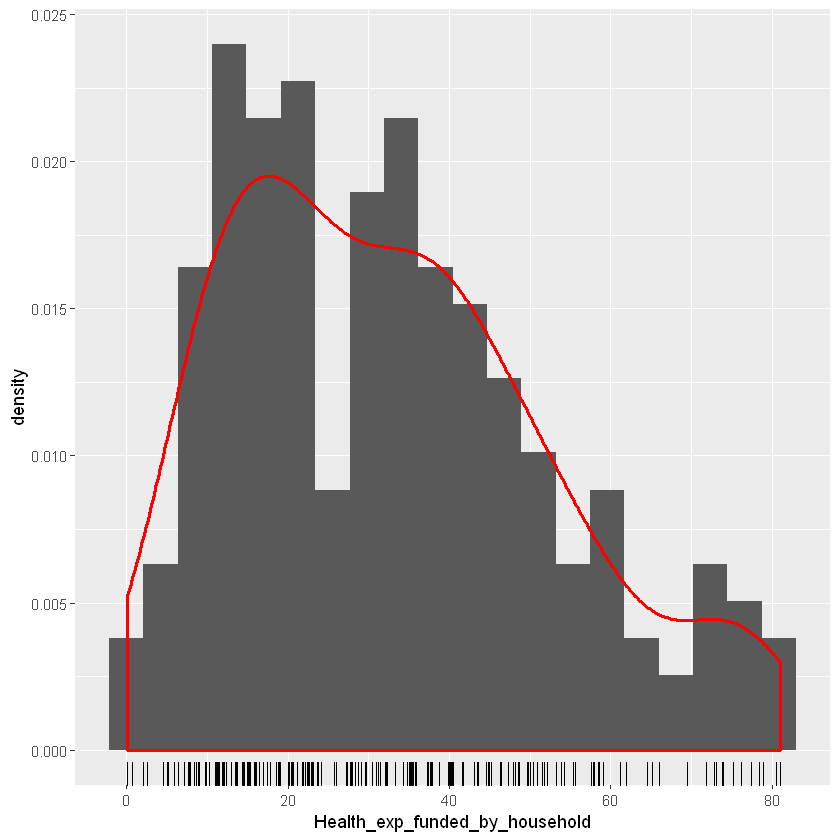

In [28]:
ggplot(imputed_data, aes(x = Health_exp_funded_by_household)) + 
  geom_histogram(aes(y = ..density..), bins = 20) + 
  geom_density(col = "red", size = 1) + geom_rug()

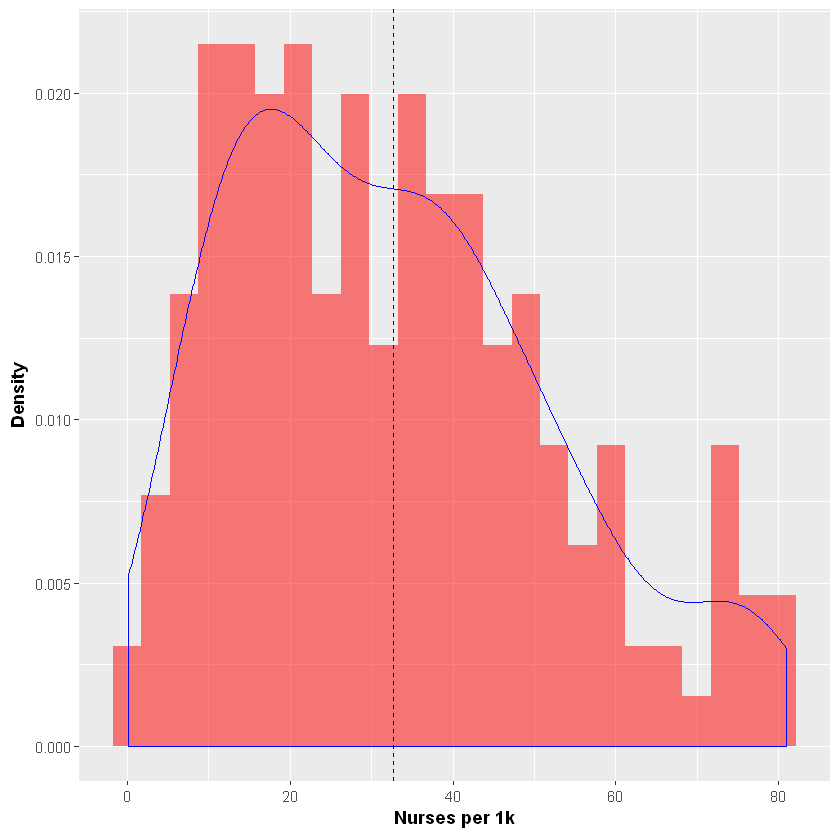

In [31]:

library(ggplot2)

ggplot(imputed_data, aes(x = Health_exp_funded_by_household)) + 
       geom_histogram(aes(y = ..density..), fill = 'red', alpha = 0.5,binwidth = 3.5) + 
       geom_density(colour = 'blue') + xlab(expression(bold('Nurses per 1k'))) + 
       ylab(expression(bold('Density')))+
       geom_vline(aes(xintercept=mean(Health_exp_funded_by_household)),linetype="dashed")

In [ ]:
summary(imputed_data$Health_exp_pct_of_GDP)

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 7)

imputed_data %>% ggplot(aes(Health_exp_pct_of_GDP)) +
    geom_histogram(color = "black", fill = "grey") +
    geom_vline(xintercept = mean(df$Health_exp_pct_of_GDP), lwd = 2) + 
    labs(title = "Distribution of Health expenditure as percentage of GDP", x = "Percentage of GDP as health expenditures", y = "Number of countries") +
    theme(text = element_text(size = 20))

In [140]:
mcor<-round(cor(imputed_data[,2:11]),2)
upper<-mcor
upper[upper.tri(mcor)]<-""
upper<-as.data.frame(upper)

In [157]:
corstars(imputed_data[,2:11])
print("p < .0001 ‘****’; p < .001 ‘***’, p < .01 ‘**’, p < .05 ‘*’")

,Health_exp_pct_of_GDP,Health_exp_funded_by_public,Health_exp_funded_by_household,Health_exp_percapita_USD,Health_exp_percapita_PPP,Health_exp_pct_funded_by_externals,Physicians_per_1000,Nurses_per_1000,Specialist_surgical_per_100000
Health_exp_pct_of_GDP,,,,,,,,,
Health_exp_funded_by_public,0.22**,,,,,,,,
Health_exp_funded_by_household,-0.25***,-0.77****,,,,,,,
Health_exp_percapita_USD,0.47****,0.49****,-0.35****,,,,,,
Health_exp_percapita_PPP,0.46****,0.58****,-0.38****,0.96****,,,,,
Health_exp_pct_funded_by_externals,0.02,-0.47****,-0.12,-0.32****,-0.43****,,,,
Physicians_per_1000,0.31****,0.53****,-0.19**,0.58****,0.66****,-0.55****,,,
Nurses_per_1000,0.34****,0.57****,-0.33****,0.76****,0.78****,-0.42****,0.75****,,
Specialist_surgical_per_100000,0.31****,0.46****,-0.16*,0.52****,0.60****,-0.47****,0.87****,0.71****,
Birth_reg_pct,0.26***,0.54****,-0.23**,0.35****,0.45****,-0.54****,0.56****,0.50****,0.52****


[1] "p < .0001 ‘****’; p < .001 ‘***’, p < .01 ‘**’, p < .05 ‘*’"


In [152]:
install.packages("Hmisc")

also installing the dependencies 'png', 'jpeg', 'checkmate', 'survival', 'Formula', 'latticeExtra', 'acepack', 'htmlTable'



package 'png' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'checkmate' successfully unpacked and MD5 sums checked
package 'survival' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'acepack' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bruno Reis\AppData\Local\Temp\RtmpY7QGiD\downloaded_packages


In [155]:
# x is a matrix containing the data
# method : correlation method. "pearson"" or "spearman"" is supported
# removeTriangle : remove upper or lower triangle
# results :  if "html" or "latex"
  # the results will be displayed in html or latex format
corstars <-function(x, method=c("pearson", "spearman"), removeTriangle=c("upper", "lower"),
                     result=c("none", "html", "latex")){
    #Compute correlation matrix
    require(Hmisc)
    x <- as.matrix(x)
    correlation_matrix<-rcorr(x, type=method[1])
    R <- correlation_matrix$r # Matrix of correlation coeficients
    p <- correlation_matrix$P # Matrix of p-value 
    
    ## Define notions for significance levels; spacing is important.
    mystars <- ifelse(p < .0001, "****", ifelse(p < .001, "*** ", ifelse(p < .01, "**  ", ifelse(p < .05, "*   ", "    "))))
    
    ## trunctuate the correlation matrix to two decimal
    R <- format(round(cbind(rep(-1.11, ncol(x)), R), 2))[,-1]
    
    ## build a new matrix that includes the correlations with their apropriate stars
    Rnew <- matrix(paste(R, mystars, sep=""), ncol=ncol(x))
    diag(Rnew) <- paste(diag(R), " ", sep="")
    rownames(Rnew) <- colnames(x)
    colnames(Rnew) <- paste(colnames(x), "", sep="")
    
    ## remove upper triangle of correlation matrix
    if(removeTriangle[1]=="upper"){
      Rnew <- as.matrix(Rnew)
      Rnew[upper.tri(Rnew, diag = TRUE)] <- ""
      Rnew <- as.data.frame(Rnew)
    }
    
    ## remove lower triangle of correlation matrix
    else if(removeTriangle[1]=="lower"){
      Rnew <- as.matrix(Rnew)
      Rnew[lower.tri(Rnew, diag = TRUE)] <- ""
      Rnew <- as.data.frame(Rnew)
    }
    
    ## remove last column and return the correlation matrix
    Rnew <- cbind(Rnew[1:length(Rnew)-1])
    if (result[1]=="none") return(Rnew)
    else{
      if(result[1]=="html") print(xtable(Rnew), type="html")
      else print(xtable(Rnew), type="latex") 
    }
    print("p < .0001 ‘****’; p < .001 ‘***’, p < .01 ‘**’, p < .05 ‘*’")
} 
